# Rose_Image
Display image in a new canvas and pad.




**Author:** Valeriy Onuchin  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:02 AM.</small></i>

In [1]:
%%cpp -d
#include "TImage.h"
#include "TCanvas.h"
#include "TArrayD.h"
#include "TROOT.h"
#include "TColor.h"
#include "TAttImage.h"
#include "TEnv.h"

TCanvas *c1;

In [2]:
TString dir = TROOT::GetTutorialDir();

TImage *img = TImage::Open(dir + "/image/rose512.jpg");

if (!img) {
   printf("Could not create an image... exit\n");
   return;
}

img->SetConstRatio(0);
img->SetImageQuality(TAttImage::kImgBest);

TString bc = "BlackChancery.ttf";
TString ar = "arial.ttf";

Draw text over image with funny font

In [3]:
img->DrawText(120, 160, "Hello World!", 32,
              gROOT->GetColor(4)->AsHexString(),
              bc, TImage::kShadeBelow);

Draw text over image with foreground specified by pixmap

In [4]:
img->DrawText(250, 350, "goodbye cruel world ...", 24, 0,
              ar, TImage::kPlain, dir + "/image/fore.xpm");

TImage *img2 = TImage::Open(dir + "/image/mditestbg.xpm");

Tile image

In [5]:
img2->Tile(img->GetWidth(), img->GetHeight());

c1 = new TCanvas("rose512", "examples of image manipulations", 760, 900);
c1->Divide(2, 3);
c1->cd(1);
img->Draw("xxx");
img->SetEditable(kTRUE);

c1->cd(2);

Averaging with mditestbg.xpm image

In [6]:
TImage *img3 = (TImage*)img->Clone("img3");
img3->Merge(img2, "allanon");
img3->Draw();

Contrasting (tint with itself)

In [7]:
c1->cd(3);
TImage *img4 = (TImage*)img->Clone("img4");
img4->Merge(img4, "tint");

Draw filled rectangle with magenta color

In [8]:
img4->FillRectangle("#FF00FF", 20, 220, 40, 40);

Render multipoint alpha-blended gradient (r->g->b)

In [9]:
img4->Gradient(0, "#FF0000 #00FF00 #220000FF", 0, 50, 50, 100, 100);

Draw semi-transparent 3d button

In [10]:
img4->Bevel(300, 20, 160, 40, "#ffffffff", "#fe000000", 3, 0);
img4->DrawLine(10, 100, 100, 10, "#0000ff", 4);
img4->Draw();

Vectorize image. reduce palette to 256 colors

In [11]:
c1->cd(4);
TImage *img5 = (TImage*)img->Clone("img5");
img5->Vectorize(256);
img5->Draw();

Quantization of the image

In [12]:
c1->cd(5);
TImage *img6 = (TImage*)img->Clone("img6");
TImagePalette *pal = (TImagePalette *)&img5->GetPalette();
TArrayD *arr = img6->GetArray(50, 40, pal);
img6->SetImage(arr->GetArray(), 50, 40, pal);
img6->Draw();

Hsv adjustment (convert red to yellow)

In [13]:
c1->cd(6);
TImage *img7 = (TImage*)img->Clone("img7");
img7->HSV(0, 40, 40);
img7->Draw();

Draw all canvases 

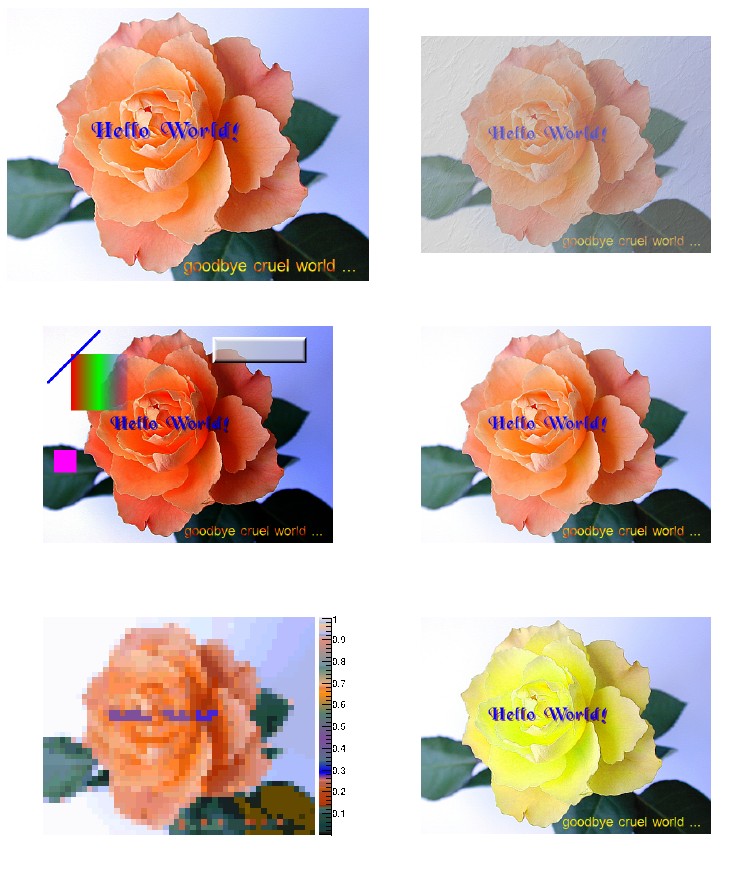

In [14]:
gROOT->GetListOfCanvases()->Draw()